In [1]:
import sys
#print(sys.version)
#!pip install twython
#!pip install tqdm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd 
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re # regex expressions
import nltk # natural lang

## Download Resources
nltk.download("vader_lexicon") 
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.sentiment.util import * 
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# 1) Preprocessing

In [2]:
def evalSentences(sentences, to_df=False, columns=[]):

  sid = SentimentIntensityAnalyzer()
  pdlist = []
  if to_df:
    for sentence in tqdm(sentences):
      ss = sid.polarity_scores(sentence)
      pdlist.append([sentence]+[ss['compound']])
    reviewDf = pd.DataFrame(pdlist)
    reviewDf.columns = columns
    return reviewDf
  else:
    for sentence in tqdm(sentences):
      print(sentence)
      ss = sid.polarity_scores(sentence)
      #print(ss)
      #print(type(ss))
      for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
      print()

In [3]:
# Example sentences
sentences = ["VADER is not smart, handsome, and funny .",
             "VADER is not smart and  handsome and funny and happy and good .",
             "VADER is not smart, but handsome, and funny",
             "VADER is smart.",
             "Professor Scott is a great professor with excellent teaching skills and research ability",
             "Eldan is a good programmer, he is very good at python and Java",
             "George is a good programmer, he is good at Java and C++ but not doing that well in python",
             "MIEXXX is such a boring course, the projects are too long to finish",
             "MIE451 is a very intersting course which taught by a great professor and very useful knowledge"]

# Vader has list of lexicons, and each lexicon is given a score from -4 to 4
evalSentences(sentences)

100%|██████████| 9/9 [00:00<00:00, 1031.19it/s]

VADER is not smart, handsome, and funny .
compound: -0.2467, neg: 0.415, neu: 0.339, pos: 0.246, 
VADER is not smart and  handsome and funny and happy and good .
compound: 0.6822, neg: 0.228, neu: 0.327, pos: 0.444, 
VADER is not smart, but handsome, and funny
compound: -0.057, neg: 0.364, neu: 0.359, pos: 0.277, 
VADER is smart.
compound: 0.4019, neg: 0.0, neu: 0.426, pos: 0.574, 
Professor Scott is a great professor with excellent teaching skills and research ability
compound: 0.8779, neg: 0.0, neu: 0.471, pos: 0.529, 
Eldan is a good programmer, he is very good at python and Java
compound: 0.7003, neg: 0.0, neu: 0.633, pos: 0.367, 
George is a good programmer, he is good at Java and C++ but not doing that well in python
compound: 0.1727, neg: 0.105, neu: 0.71, pos: 0.185, 
MIEXXX is such a boring course, the projects are too long to finish
compound: -0.3182, neg: 0.173, neu: 0.827, pos: 0.0, 
MIE451 is a very intersting course which taught by a great professor and very useful knowle

# Crawl & Parse Tripadvisor

Tripadvisor is an online travel research company, where we go to praise, criticize and make hotel reservations. Tripadvisor has tons of information regarding hotels. This can be extremely useful to understand reviews of hotels in a city, analyze price changes with season, and lot more. In this article, we will analyze real hotel review data crawled from the Tripadvisor website to automatically identify positive and negative keywords and phrases associated with hotels and to better understand characteristics of data analysis tools, extracting explanatory review summaries, and human reviewing behavior.

In an effort to understand hotel guests reviews, I crawled the TripAdvisor website for the hotels in the city of Niagara Falls. I for 18130 reviews from 69 hotels. To use the Tripadvisor crawler, download the Python files from
[here](https://github.com/aesuli/trip-advisor-crawler). First run the crawler trip-advisor-crawler.py from the command with a city selection and then parse all crawled html file into csv using parser.py. If we search the hotel reviews of city Niagara Falls on Tripadvisor, we can observe that the web address is https://www.tripadvisor.com/Hotels-g154998-Niagara_Falls_Ontario-Hotels.html. From the web address, we can find two important pieces of information for the command line invocation. First, the domain is 'com'. And second, the city code of the Niagara Falls is 154998 on Tripadvisor. To download the reviews, we will also need to specify the local path for the files. In my case, the location is the "data" folder. Then we can extract the reviews using the following command line:

`python trip−advisor−crawler.py −o data ca:154998`

The downloaded reviews are in html format. We need to process the data into the csv format so that we can easily load it into Python. Fortunately, we do not need to write the code ourself. Run the following command line after extraction from previous step:

`python parser.py −d data −o reviews.csv`

We stop crawling the hotels within the city after 10 hours (i.e., run your crawler overnight). Be aware that there are two additional things we need to do if we stop crawling manually or the file cannot be parsed due to an incomplete crawl:

• In ids.txt file, delete the last hotel’s reviews entirely (all reviews for that hotel).

• In the data folders, delete the folder of the same hotel entirely.


In [4]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# Read in from pandas
hotelDf = pd.read_csv('/content/gdrive/My Drive/Advanced Topics/Hotel Reviews/reviews.csv', header=None)
hotelDf.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth']

In [6]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,data\ca\154998\1012890\114958586.html,E-Lodge Near the Falls,"""my husband son and I came for Canada Day. We...",4,positive
1,data\ca\154998\1012890\115635091.html,E-Lodge Near the Falls,"""Smashing!! We were welcomed to the Motel by e...",5,positive
2,data\ca\154998\1012890\179991947.html,E-Lodge Near the Falls,"""We chose this hotel as we had a car and did n...",2,negative
3,data\ca\154998\1012890\204581030.html,E-Lodge Near the Falls,"""Very affordable rooms in the Niagara Falls ar...",4,positive
4,data\ca\154998\1012890\294800654.html,E-Lodge Near the Falls,"""I booked this hotel online, without having se...",1,negative


In [7]:
hotelDf.shape

(18131, 5)

In [8]:
reviews = hotelDf['reviewColumn'].values 

In [9]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])
reviewDF.head()

100%|██████████| 18131/18131 [00:27<00:00, 663.44it/s]


,reviewCol,vader
0,"""my husband son and I came for Canada Day. We...",0.9017
1,"""Smashing!! We were welcomed to the Motel by e...",0.9114
2,"""We chose this hotel as we had a car and did n...",0.5951
3,"""Very affordable rooms in the Niagara Falls ar...",0.0129
4,"""I booked this hotel online, without having se...",-0.7219


*A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.*

```
from collections import Counter
 
myList = [1,1,2,3,4,5,3,2,3,4,2,1,2,3]

print(Counter(myList))

print(Counter(myList).items())

print(Counter(myList).keys())

print(Counter(myList).values())
```

*Create and Update Counters - An empty Counter can be constructed with no arguments and populated via the update() method. The count values are increased based on the new data, rather than replaced. In the below example, the count for a goes from 3 to 4.*

```
from collections import Counter

c = Counter()
print ('Initial :', c)

c.update('abcdaab')
print ('Sequence:', c)

c.update({'a':1, 'd':5})
print ('Dict:', c)
```

*Most Common Words - Use most_common() to produce a sequence of the n most frequently encountered keys and their respective values. The below example counts the letters appearing in all of the words in the system dictionary to produce a frequency distribution, then prints the two most common letters.*

```
c = Counter()
print ('Initial :', c)
 
c.update('abcdaab')
print ('Sequence:', c)
 
c.update('abcdaab')
print ('Dict:', c)

print ('Most Common:', c.most_common(2)) 
```

*Use of List Comprehensions*

```
# https://stackoverflow.com/questions/4260280/if-else-in-a-list-comprehension

In general,

[f(x) if condition else g(x) for x in sequence]

And, for list comprehensions with if conditions only,

[f(x) for x in sequence if condition]
```

In [10]:
def dataFrameTransformation(hotelDf, reviewDF, k=500):
  reviews = reviewDF['reviewCol'].values
  from nltk.corpus import stopwords
  stop = set(stopwords.words('english'))

  counter = Counter()
  for review in reviews:
    counter.update([word.lower() 
                    for word 
                    in re.findall(r'\w+', review) 
                    if word.lower() not in stop and len(word) > 2])
  topk = counter.most_common(k)        

  freqReview = []

  for i in range(len(reviews)):
    tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
    freqReview.append(topkinReview)
      
  freqReviewDf = pd.DataFrame(freqReview)
  dfName = []
  for c in topk:
    dfName.append(c[0])
  freqReviewDf.columns = dfName
  finalreviewDf = reviewDF.join(freqReviewDf)
  finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
  return topk, finaldf

In [11]:
topk, finaldf = dataFrameTransformation(hotelDf, reviewDF, k=500)

In [12]:
topk[0:15]

[('room', 29702),
 ('hotel', 25347),
 ('falls', 22254),
 ('view', 13200),
 ('great', 10265),
 ('stay', 9975),
 ('would', 8946),
 ('staff', 8210),
 ('clean', 7660),
 ('one', 7224),
 ('night', 7209),
 ('good', 7171),
 ('rooms', 6972),
 ('nice', 6914),
 ('niagara', 6397)]

In [13]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,room,hotel,falls,view,great,stay,would,staff,clean,one,night,good,rooms,nice,niagara,parking,stayed,floor,breakfast,quot,get,time,also,location,service,nthe,could,day,well,friendly,area,check,back,walk,like,...,dollars,show,rainbow,entire,business,sitting,complimentary,skyline,river,ended,chose,order,travel,ceiling,others,change,shuttle,non,believe,waiting,microwave,crowne,head,local,poor,point,nthere,past,self,noverall,older,families,tell,cleaned,fall,week,rather,safe,light,four
0,E-Lodge Near the Falls,4,positive,"""my husband son and I came for Canada Day. We...",0.9017,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,E-Lodge Near the Falls,5,positive,"""Smashing!! We were welcomed to the Motel by e...",0.9114,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,E-Lodge Near the Falls,2,negative,"""We chose this hotel as we had a car and did n...",0.5951,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,E-Lodge Near the Falls,4,positive,"""Very affordable rooms in the Niagara Falls ar...",0.0129,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E-Lodge Near the Falls,1,negative,"""I booked this hotel online, without having se...",-0.7219,1,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Analysis**

The TopK is the list of 500 most frequent words. we can see that as expected the words room, hotel, stay, staff appear becuase irrespective of the type of the review these words appear. So I will consider them as stop words in further analysis.

# Q1 Sentiment Analysis and Aggregation

(a) Compute average Vader sentiment and average ground truth rating per hotel.

(b) Rank hotels by

(i) Average Ground Truth Sentiment

(ii) Average Vader Compound Sentiment Score

Show both top-5 and bottom-5 for both ranking methods. Do they agree or are there interesting differences?

In [14]:
# List of hotels
hotelNames = finaldf['hotelName'].unique()
hotelNames

array(['E-Lodge Near the Falls', 'Rainbow Bed and Breakfast',
       'River Rapids Inn', 'Always Inn Bed &amp; Breakfast',
       'Blue Gables Bed &amp; Breakfast',
       'Crowne Plaza Niagara Falls - Fallsview', 'Falcon Inn',
       'Rainbow Motor Inn', 'Trillium Bed &amp; Breakfast', 'Oasis Motel',
       'Sharp Motel', 'Wenxin Bed &amp; Breakfast', 'The Highlander Inn',
       'Golf Inn', 'Sunrise Inn', 'Crystal Inn on the Parkway',
       'The Falls Family Lodge', 'Riverview Motel', 'Space Motel',
       'A1StarInn Motel', 'Lundy&#39;s Motel',
       'Grand Memories Hotel &amp; Suites',
       'Niagara&#39;s Emerald Falls Bed &amp; Breakfast',
       'Scottish Inns - Near the Falls &amp; Casino', 'Ascot Manor',
       'Rockwell Resort', 'Fullerton Manor Inn', 'Milan Garden Inn',
       'Serene Niagara Inn', 'Two Rivers Bed &amp; Breakfast',
       'The Cobbled Path Bed &amp; Breakfast', 'Three Diamond Inn',
       'River Road Fireside Hotel', 'Best Western Plus Cairn Croft Hotel',

In [15]:
def getHotelRank(df, measure='ratingScore'):
  #Rank the hotel by ground truth rating score
  hotelRating = []
  for hotel in hotelNames:
    itemDf = df.loc[df['hotelName']==hotel]
    hotelRating.append([hotel,itemDf[measure].mean()])
  hotelRatingDfGt = pd.DataFrame(hotelRating)
  hotelRatingDfGt.columns=['hotelName','avgRatingScore']
  hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
  return hotelRatingDfGt

In [16]:
hotelRatingDfGt = getHotelRank(finaldf)

In [17]:
def getHotelRankvader(df, measure='ratingScore'):
  #Rank the hotel by ground truth rating score
  hotelRating = []
  for hotel in hotelNames:
      itemDf = df.loc[df['hotelName']==hotel]
      hotelRating.append([hotel,itemDf[measure].mean()])
  hotelRatingDfGt = pd.DataFrame(hotelRating)
  hotelRatingDfGt.columns=['hotelName','avgvadersentiment']
  hotelRatingDfGt = hotelRatingDfGt.sort_values('avgvadersentiment',ascending=0)
  return hotelRatingDfGt

In [18]:
hotelRatingDfVd = getHotelRankvader(finaldf, measure='vader')

In [19]:
hotelRatingDfGt.head(5)

,hotelName,avgRatingScore
10,Sharp Motel,5.000000
28,Serene Niagara Inn,5.000000
24,Ascot Manor,5.000000
11,Wenxin Bed &amp; Breakfast,5.000000
29,Two Rivers Bed &amp; Breakfast,4.921739


In [20]:
hotelRatingDfVd.head(5)

,hotelName,avgvadersentiment
28,Serene Niagara Inn,0.981600
11,Wenxin Bed &amp; Breakfast,0.976900
10,Sharp Motel,0.964700
29,Two Rivers Bed &amp; Breakfast,0.960105
25,Rockwell Resort,0.955780


In [21]:
hotelRatingDfGt.tail(5)

,hotelName,avgRatingScore
9,Oasis Motel,1.800000
57,Admiral Inn by the Falls,1.787500
51,Niagara Lodge &amp; Suites,1.752381
21,Grand Memories Hotel &amp; Suites,1.666667
7,Rainbow Motor Inn,1.605263


In [22]:
hotelRatingDfVd.tail(5)

,hotelName,avgvadersentiment
51,Niagara Lodge &amp; Suites,-0.006416
57,Admiral Inn by the Falls,-0.037961
7,Rainbow Motor Inn,-0.073824
21,Grand Memories Hotel &amp; Suites,-0.092778
13,Golf Inn,-0.264833


In [23]:
finaldf[finaldf['hotelName'] == 'Golf Inn']

,hotelName,ratingScore,groundTruth,reviewCol,vader,room,hotel,falls,view,great,stay,would,staff,clean,one,night,good,rooms,nice,niagara,parking,stayed,floor,breakfast,quot,get,time,also,location,service,nthe,could,day,well,friendly,area,check,back,walk,like,...,dollars,show,rainbow,entire,business,sitting,complimentary,skyline,river,ended,chose,order,travel,ceiling,others,change,shuttle,non,believe,waiting,microwave,crowne,head,local,poor,point,nthere,past,self,noverall,older,families,tell,cleaned,fall,week,rather,safe,light,four
1505,Golf Inn,1,negative,"""After nearly 40 years of travelling, I finall...",-0.9319,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1506,Golf Inn,1,negative,"""omg i cant even explain it all. i dont know h...",-0.7710,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1507,Golf Inn,5,positive,"""This is a motel for people with great sense o...",0.9084,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


From the results above we can see that the absolute ranking is different but in both top 5 (Id: 10,28,11,29) and bottom 5 (Id: 51,57,7,21) there are four hotels in common means they almost have same relative ranking.

Reasons:

1. Vader sentiment score is purely based on words used by the user and each user eventhough uses the same word "best" they can rate differently because the word best is different to them both.

2. If the number of reviews for a hotel are small then its ranking in both list could be different. In my case the vader predicted the most negative review for "Golf Inn" hotel and we can see that the hotel has only three review.

# Q2. Frequency Analysis

(a) Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth
sentiment to rank the top-50 most frequent non-stopwords in the review collection. Do you
note anything interesting and/or locale-specific about these top-ranked words?

(b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

In [24]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]

In [25]:
itemAnalysisDf.head()

,reviewCol,groundTruth,vader
0,"""my husband son and I came for Canada Day. We...",positive,0.9017
1,"""Smashing!! We were welcomed to the Motel by e...",positive,0.9114
2,"""We chose this hotel as we had a car and did n...",negative,0.5951
3,"""Very affordable rooms in the Niagara Falls ar...",positive,0.0129
4,"""I booked this hotel online, without having se...",negative,-0.7219


In [26]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
  from nltk.corpus import stopwords
  stop = set(stopwords.words('english'))

  stop.add('room')
  stop.add('hotel')
  stop.add('stay')
  stop.add('staff')
  stop.add('rooms')
  counter = Counter()
  for review in df[operation(df[label_column],label_value)][value_column]:
    counter.update([word.lower() 
                    for word 
                    in re.findall(r'\w+', review) 
                    if word.lower() not in stop and len(word) > 2])
  topk = counter.most_common(k)
  return topk

In [27]:
topkGroundPos = getTopK(df=itemAnalysisDf, k=50, label_value='positive')

In [28]:
topkGroundPos[0:10]

[('falls', 18057),
 ('view', 10324),
 ('great', 8534),
 ('clean', 5823),
 ('would', 5488),
 ('nice', 5088),
 ('niagara', 5070),
 ('good', 4964),
 ('night', 4424),
 ('one', 4386)]

In [29]:
topkGroundNeg = getTopK(df=itemAnalysisDf, k=50, label_value='negative')

In [30]:
topkGroundNeg[0:10]

[('falls', 4197),
 ('would', 3458),
 ('quot', 3018),
 ('view', 2876),
 ('one', 2838),
 ('night', 2785),
 ('get', 2300),
 ('parking', 2280),
 ('good', 2207),
 ('could', 1897)]

In [31]:
pos = dict(topkGroundPos)
neg = dict(topkGroundNeg)
neg.update(pos)
#len(neg)
pos

{'also': 3467,
 'amazing': 2154,
 'amp': 2059,
 'area': 3192,
 'back': 2547,
 'bed': 2259,
 'best': 2168,
 'breakfast': 4279,
 'check': 2496,
 'clean': 5823,
 'comfortable': 2931,
 'could': 2652,
 'day': 2913,
 'desk': 2081,
 'excellent': 2043,
 'falls': 18057,
 'fallsview': 2291,
 'floor': 4286,
 'food': 2144,
 'free': 2228,
 'friendly': 3578,
 'front': 2173,
 'get': 3453,
 'good': 4964,
 'great': 8534,
 'helpful': 2609,
 'like': 2146,
 'location': 3582,
 'niagara': 5070,
 'nice': 5088,
 'night': 4424,
 'nthe': 3102,
 'one': 4386,
 'parking': 3881,
 'place': 2471,
 'pool': 2255,
 'quot': 2807,
 'really': 2368,
 'recommend': 2210,
 'restaurant': 2665,
 'right': 2192,
 'see': 2152,
 'service': 3221,
 'stayed': 4257,
 'time': 3467,
 'two': 2575,
 'view': 10324,
 'walk': 3105,
 'well': 3348,
 'would': 5488}

If we compare the top 50 words in both lists, we can see there are 35 words in common. It means people use the same words in both positive and negative reviews or complain and care about the same things. 
For example the words "location","parking" and "breakfast" appears in both lists.

We can also see some locale specific words like "niagara", "falls" because the hotels are in the city of Niagara falls. Similarly for the top negative words the word "falls" appears.


**1) POS-Tag**

```
from nltk.tokenize import word_tokenize
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)
```

**2)** Stemming and Lemmatization are **Text Normalization** techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing. Languages we speak and write are made up of several words often derived from one another. When a language contains words that are derived from another word as their use in the speech changes is called **Inflected Language**. In grammar, inflection is the modification of a word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, and mood. 


**Stemming**

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the language. So stemming a word or sentence may result in words that are not actual words. Stems are created by removing the suffixes or prefixes used with a word.


**Lemmatization** 

Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. For example, runs, running, ran are all forms of the word run, therefore run is the lemma of all these words. Because lemmatization returns an actual word of the language, it is used where it is necessary to get valid words. Python NLTK provides WordNet Lemmatizer that uses the WordNet Database to lookup lemmas of words. Lemmatization uses
POS tags to improve stemming. You need to provide the context in which you want to lemmatize that is the parts-of-speech (POS). This is done by giving the value for pos parameter in wordnet_lemmatizer.lemmatize.

**3) Chunking**

Chunking is a process of extracting phrases from unstructured text. Sometimes simple tokens may not represent the actual meaning of the text, and this is where phrases can be good source of information. Chunking  is a task that follows Part-Of-Speech Tagging and that adds more structure to the sentence. The result is a grouping of the words in "chunks".

**Noun Phrase Chunking**

NP-chunking is one of the most useful sources of information for and can be done on part-of-speech tagged words. This is one of the motivations for performing part-of-speech tagging. We demonstrate this approach using an example sentence that has been part-of-speech tagged. In order to create an NP-chunker, we will first define a *chunk grammar*, consisting of rules that indicate how sentences should be chunked. In this case, we will define a simple grammar with a single regular-expression rule. This rule says that an NP chunk should be formed whenever the chunker finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN). Using this grammar, we create a *chunk parser*, and test it on our example sentence. The result is a *tree*, which we can either print, or display graphically.

**Example - 1**

```
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

grammar = "NP: {<DT>?<JJ>*<NN>}"

cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
print(result)
```

**Example - 2**

```
# Example of a simple regular expression based NP chunker.
import nltk
nltk.download('punkt')

sentence = "the little yellow dog barked at the cat"

# POS tag the sentence
tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

# Define your grammar using regular expressions
grammar = ('''NP: {<DT>?<JJ>*<NN>}''')

chunkParser = nltk.RegexpParser(grammar)
tree = chunkParser.parse(tagged)
print(tree)
```

The POS tagger in the NLTK library outputs specific tags for certain words. The list of POS tags is as follows, with examples of what each POS stands for.

```
CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
LS list marker 1)
MD modal could, will
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
PDT predeterminer ‘all the kids’
POS possessive ending parent’s
PRP personal pronoun I, he, she
PRP$ possessive pronoun my, his, hers
RB adverb very, silently,
RBR adverb, comparative better
RBS adverb, superlative best
RP particle give up
TO, to go ‘to’ the store.
UH interjection, errrrrrrrm
VB verb, base form take
VBD verb, past tense, took
VBG verb, gerund/present participle taking
VBN verb, past participle is taken
VBP verb, sing. present, known-3d take
VBZ verb, 3rd person sing. present takes
WDT wh-determiner which
WP wh-pronoun who, what
WP$ possessive wh-pronoun whose
WRB wh-adverb where, when
```


https://www.nltk.org/book/ch07.html

https://medium.com/greyatom/learning-pos-tagging-chunking-in-nlp-85f7f811a8cb

https://www.datacamp.com/community/tutorials/stemming-lemmatization-python


In [32]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
  """Finds NP (nounphrase) leaf nodes of a chunk tree."""
  for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
      yield subtree.leaves()

# stemming, lematizing, lower case... 
# Lemmatization is basically Stemming with POS
# WordNet Lematization Stems using POS
def normalise(word, pos):
  """Normalises words to lowercase and lemmatizes and stems it."""
  word = word.lower()
  pos = pos[0]
  wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
  stemmed_tokens = []
  try:
    pos = wn_tags[pos]
    word = lemmatizer.lemmatize(word, pos=pos)
  except:
    word = stemmer.stem(word)
    
  return word

# stop-words and length control
def acceptable_word(word):
  """Checks conditions for acceptable word: length, stopword."""
  accepted = bool(2 <= len(word) <= 40 and word.lower() not in stopwords)
  return accepted

# generator, create item once a time
def get_terms(tree):
  for leaf in leaves(tree):
    #print(leaf)
    term = [normalise(w,t) for w,t in leaf if acceptable_word(w) ]
    #print(term)
    # Phrase only
    if len(term)>1:
      yield term

# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
  finalList =[]
  for phrase in npTokenList:
    token = ''
    for word in phrase:
      token += word + ' '
    finalList.append(token.rstrip())
  return finalList

In [33]:
def newDataFrameTransformation(hotelDf, reviewDF, k=500):
  reviews = reviewDF['reviewCol'].values

  # Top-k frequent terms
  counter = Counter()
  for review in reviews:
    counter.update(flatten([word
                            for word
                            in get_terms(chunker.parse(nltk.pos_tag(re.findall(r'\w+', review))))]))
  topk = counter.most_common(k)        

  #Find out if a particular review has the word from topk list
  freqReview = []
  for i in range(len(reviews)):
    tempCounter = Counter(flatten([word
                                   for word
                                   in get_terms(chunker.parse(nltk.pos_tag(re.findall(r'\w+',reviews[i]))))]))
    topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
    freqReview.append(topkinReview)
      
  #Prepare freqReviewDf
  freqReviewDf = pd.DataFrame(freqReview)
  dfName = []
  for c in topk:
    dfName.append(c[0])
  freqReviewDf.columns = dfName
  finalreviewDf = reviewDF.join(freqReviewDf)
  finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
  return topk, finaldf

In [34]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [35]:
reviewDF['reviewCol'][3]

'"Very affordable rooms in the Niagara Falls area. Queen beds with fair size bathroom with tub. Just outside of the tourist area. No breakfast included but walking distance to Tim Hortons. Quick drive to all the other restaurants. '

In [36]:
re.findall(r'\w+', reviewDF['reviewCol'][3])

['Very',
 'affordable',
 'rooms',
 'in',
 'the',
 'Niagara',
 'Falls',
 'area',
 'Queen',
 'beds',
 'with',
 'fair',
 'size',
 'bathroom',
 'with',
 'tub',
 'Just',
 'outside',
 'of',
 'the',
 'tourist',
 'area',
 'No',
 'breakfast',
 'included',
 'but',
 'walking',
 'distance',
 'to',
 'Tim',
 'Hortons',
 'Quick',
 'drive',
 'to',
 'all',
 'the',
 'other',
 'restaurants']

In [37]:
nltk.pos_tag(re.findall(r'\w+', reviewDF['reviewCol'][3]))

[('Very', 'RB'),
 ('affordable', 'JJ'),
 ('rooms', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('Niagara', 'NNP'),
 ('Falls', 'NNP'),
 ('area', 'NN'),
 ('Queen', 'NNP'),
 ('beds', 'VBZ'),
 ('with', 'IN'),
 ('fair', 'JJ'),
 ('size', 'NN'),
 ('bathroom', 'NN'),
 ('with', 'IN'),
 ('tub', 'NN'),
 ('Just', 'NNP'),
 ('outside', 'IN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('tourist', 'NN'),
 ('area', 'NN'),
 ('No', 'NNP'),
 ('breakfast', 'NN'),
 ('included', 'VBD'),
 ('but', 'CC'),
 ('walking', 'VBG'),
 ('distance', 'NN'),
 ('to', 'TO'),
 ('Tim', 'NNP'),
 ('Hortons', 'NNP'),
 ('Quick', 'NNP'),
 ('drive', 'NN'),
 ('to', 'TO'),
 ('all', 'PDT'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('restaurants', 'NNS')]

In [38]:
chunker = nltk.RegexpParser(grammar)
tree = (chunker.parse(nltk.pos_tag(re.findall(r'\w+', reviewDF['reviewCol'][3]))))
print(tree)

(S
  Very/RB
  (NP (NBAR affordable/JJ rooms/NNS))
  in/IN
  the/DT
  (NP (NBAR Niagara/NNP Falls/NNP area/NN Queen/NNP))
  beds/VBZ
  with/IN
  (NP (NBAR fair/JJ size/NN bathroom/NN))
  with/IN
  (NP (NBAR tub/NN Just/NNP))
  outside/IN
  of/IN
  the/DT
  (NP (NBAR tourist/NN area/NN No/NNP breakfast/NN))
  included/VBD
  but/CC
  walking/VBG
  (NP (NBAR distance/NN))
  to/TO
  (NP (NBAR Tim/NNP Hortons/NNP Quick/NNP drive/NN))
  to/TO
  all/PDT
  the/DT
  (NP (NBAR other/JJ restaurants/NNS)))


In [39]:
get_terms(chunker.parse(nltk.pos_tag(re.findall(r'\w+', reviewDF['reviewCol'][111]))))

<generator object get_terms at 0x7f8dcedfb308>

In [40]:
([word for word in get_terms(chunker.parse(nltk.pos_tag(re.findall(r'\w+', reviewDF['reviewCol'][111]))))])

[['first', 'experience'],
 ['awesome', 'nfirst', 'impression', 'john'],
 ['chris', 'warm'],
 ['land', 'john'],
 ['detailed', 'breakdown'],
 ['free', 'water'],
 ['nthe', 'house'],
 ['beautiful', 'look'],
 ['visit', 'allowed'],
 ['nhouse', 'room'],
 ['lighthouse', 'room'],
 ['new', 'year'],
 ['different', 'room'],
 ['comfortable', 'convenient'],
 ['first', 'day'],
 ['home', 'fry'],
 ['personal', 'favorite', 'ntreatment', 'stay', 'analysis'],
 ['great', 'john'],
 ['bank', 'machine'],
 ['extra', 'pillow'],
 ['last', 'day'],
 ['solid', 'direction'],
 ['wine', 'tour', 'fall'],
 ['new', 'year', 'walking'],
 ['cab', 'driver'],
 ['dollar', 'fare'],
 ['horseshoe', 'fall'],
 ['regular', 'pace'],
 ['busy', 'john'],
 ['great', 'enjoyable', 'stay'],
 ['unforgettable', 'experience'],
 ['funny', 'story'],
 ['amp', 'nthanks']]

In [41]:
(flatten([word for word in get_terms(chunker.parse(nltk.pos_tag(re.findall(r'\w+', reviewDF['reviewCol'][111]))))]))

['first experience',
 'awesome nfirst impression john',
 'chris warm',
 'land john',
 'detailed breakdown',
 'free water',
 'nthe house',
 'beautiful look',
 'visit allowed',
 'nhouse room',
 'lighthouse room',
 'new year',
 'different room',
 'comfortable convenient',
 'first day',
 'home fry',
 'personal favorite ntreatment stay analysis',
 'great john',
 'bank machine',
 'extra pillow',
 'last day',
 'solid direction',
 'wine tour fall',
 'new year walking',
 'cab driver',
 'dollar fare',
 'horseshoe fall',
 'regular pace',
 'busy john',
 'great enjoyable stay',
 'unforgettable experience',
 'funny story',
 'amp nthanks']

In [42]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, reviewDF)

In [43]:
def getTopKphrase(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
  #stop = set(stopwords.words('english'))

  counter = Counter()
  for review in df.loc[operation(df[label_column],label_value)][value_column]:
    counter.update(flatten([word
                            for word in get_terms(chunker.parse(nltk.pos_tag(re.findall(r'\w+', review))))]))
  topk = counter.most_common(k)  

  return topk

In [44]:
topkGroundPosphrase = getTopKphrase(df=finaldf_phrase, k=50, label_value='positive')

In [45]:
topkGroundPosphrase

[('niagara fall', 2106),
 ('clifton hill', 782),
 ('front desk', 756),
 ('great view', 687),
 ('fallsview room', 425),
 ('american fall', 409),
 ('horseshoe fall', 370),
 ('minute walk', 369),
 ('breakfast buffet', 348),
 ('great location', 337),
 ('amazing view', 334),
 ('water park', 280),
 ('short walk', 275),
 ('nthe room', 270),
 ('hotel room', 270),
 ('hot tub', 266),
 ('hotel staff', 264),
 ('falls view room', 262),
 ('great place', 255),
 ('first time', 253),
 ('canadian side', 250),
 ('great time', 245),
 ('fall view', 243),
 ('nthe hotel', 232),
 ('room service', 231),
 ('marriott fallsview', 209),
 ('queen bed', 207),
 ('spectacular view', 207),
 ('rainbow bridge', 198),
 ('great hotel', 195),
 ('great stay', 190),
 ('fall view room', 186),
 ('crowne plaza', 183),
 ('beautiful view', 183),
 ('valet parking', 182),
 ('indoor pool', 176),
 ('front desk staff', 175),
 ('night stay', 174),
 ('canadian fall', 174),
 ('buffet breakfast', 173),
 ('parking lot', 166),
 ('fantastic v

In [46]:
topkGroundNegphrase = getTopKphrase(df=itemAnalysisDf, k=50, label_value='negative')

In [47]:
topkGroundNegphrase

[('front desk', 846),
 ('niagara fall', 580),
 ('clifton hill', 273),
 ('great view', 182),
 ('parking lot', 159),
 ('hotel room', 152),
 ('water park', 152),
 ('hot tub', 150),
 ('nthe room', 148),
 ('next day', 148),
 ('credit card', 134),
 ('customer service', 133),
 ('night stay', 114),
 ('star hotel', 109),
 ('next morning', 107),
 ('front desk staff', 107),
 ('fallsview room', 102),
 ('great location', 98),
 ('queen bed', 95),
 ('resort fee', 94),
 ('good thing', 92),
 ('next time', 91),
 ('first night', 90),
 ('crowne plaza', 90),
 ('nthe hotel', 89),
 ('minute walk', 88),
 ('pool area', 88),
 ('indoor pool', 80),
 ('hot water', 78),
 ('room service', 77),
 ('parking fee', 77),
 ('free parking', 75),
 ('hotel staff', 74),
 ('falls view room', 73),
 ('breakfast buffet', 73),
 ('first time', 73),
 ('double bed', 69),
 ('american fall', 69),
 ('coffee maker', 69),
 ('good view', 64),
 ('free wifi', 64),
 ('fall view', 63),
 ('nice hotel', 63),
 ('nice view', 61),
 ('short walk', 61

In [48]:
lista = set([i[0] for i in topkGroundPosphrase])
listb = set([i[0] for i in topkGroundNegphrase])
lista.intersection(listb), len(lista.intersection(listb))

({'american fall',
  'breakfast buffet',
  'clifton hill',
  'crowne plaza',
  'fall view',
  'falls view room',
  'fallsview room',
  'first time',
  'free wifi',
  'front desk',
  'front desk staff',
  'good view',
  'great location',
  'great view',
  'hot tub',
  'hotel room',
  'hotel staff',
  'indoor pool',
  'minute walk',
  'next time',
  'niagara fall',
  'nice hotel',
  'night stay',
  'nthe hotel',
  'nthe room',
  'parking lot',
  'pool area',
  'queen bed',
  'room service',
  'short walk',
  'valet parking',
  'water park'},
 32)

If we compare the top 50 word in both lists we can see there are 31 phrases in common. It means people use the same words in both positive and negative reviews or complain and care about the same things. For example the words "front desk","front desk staff" and "breakfast buffet" appears in both lists.

Also the frequency of phrases is very less than the words because no two people use the same phrase. We can also see locale specific phrases. For example in pos phrases "niagara fall", "great view", "fall view room", "horseshoe fall" becuase the hotels are in windsor and this city has river front and has the ambassdor bridge.

Simlarly for the top negative words the words "front desk","front desk staff, 23" make more sense beucase the people complain about them. And also the "holdiay inn" and "hamptoprint(lista.intersection(listb))
ninn" words refer to the hotels with same name in windsor

# Q3 Mutual Information

(a) Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentiment-bearing non-stopwords in the review collection. Do you note anything interesting and/or locale-specific about these top-ranked words?

(b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

In [49]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
  miScore = []
  for word in topk:
    miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
  miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
  miScoredf.columns = ['Word','MI Score']
  return miScoredf

In [50]:
midf = [[50,50],[50,50]]
midf = pd.DataFrame(midf)
midf.columns = ['X','Y']

In [51]:
midf

,X,Y
0,50,50
1,50,50


In [52]:
metrics.mutual_info_score(midf['X'], midf['Y'])

0.0

In [53]:
midf = [[100,0],[0,100]]
midf = pd.DataFrame(midf)
midf.columns = ['X','Y']

In [54]:
midf

,X,Y
0,100,0
1,0,100


In [55]:
metrics.mutual_info_score(midf['X'], midf['Y'])


0.6931471805599453

In [56]:
math.log(2)

0.6931471805599453

In [57]:
midf = [[0,0],[100,100]]
midf = pd.DataFrame(midf)
midf.columns = ['X','Y']

In [58]:
midf

,X,Y
0,0,0
1,100,100


In [59]:
metrics.mutual_info_score(midf['X'], midf['Y'])

0.6931471805599453

In [60]:
miScoredf = getMI(topk, finaldf)

In [61]:
miScoredf.head(50)

,Word,MI Score
2,falls,0.028173
291,dirty,0.027975
95,told,0.021217
4,great,0.020800
3,view,0.016999
118,said,0.013796
73,amazing,0.012139
48,helpful,0.011541
76,excellent,0.011353
99,never,0.011276


In [62]:
miScoredf.tail(25)

,Word,MI Score
428,mini,1.069682e-05
391,including,9.811655e-06
326,higher,9.619288e-06
443,road,9.299725e-06
92,nights,7.297544e-06
259,busy,6.422289e-06
66,beds,6.343179e-06
490,older,5.509820e-06
402,bath,4.872952e-06
86,bit,4.644997e-06


If we see the top MI words we see the words are great, dirty,old,clean. This makes sense becuase great more in appears more in positive reviews and old appears in negative reviews. we can also infer them from the top 50 positive and negative words we got earlier. If we see the word breakfast which appeared top in both lists actually has very less MI score. Overall MI is sensitive to frequency and it is giving us words which differentiate between classes

We can also see some locale specific words like detroit, windsor and river appers in the list

In [63]:
miScoredf_phrase = getMI(topk_phrase, finaldf_phrase)

In [64]:
miScoredf_phrase.head(50)

,Word,MI Score
1,front desk,0.006483
50,credit card,0.002693
14,amazing view,0.002244
47,great stay,0.002207
0,niagara fall,0.002182
30,next day,0.002071
12,horseshoe fall,0.002045
29,great time,0.002006
249,bed bug,0.001850
5,american fall,0.001755


We can see that the MI values are very low for phrases in comparision to signle words becuase MI is sensitive to frequency. some top MI phrases are great view, bed sheet and eaiser acess. means people are complementing the view of the hotel in river front and the bedsheets and its accessibility. The word crecit catd has high mi meaning poeple are complaining about it. great view and detroit river are locale specific. from phrases we can understand which issues are more important.

# Q4 Pointwise Mutual Information

(a) For ground truth sentiment, calculate the top-50 words according to PMI of the word occuring with (i) positive reviews and (ii) negative reviews. Do you note anything interesting and/or locale-specific about these top-ranked words?

(b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

(c) Repeat this analysis for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two hotels? If not, explain why not.

In [65]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
  pmilist=[]
  for i in ['positive','negative']:
    for j in [0,1]:
      px = sum(df['groundTruth']==i)/len(df)
    # if px == 0:
    #   px = 0.0001
      py = sum(df[x]==j)/len(df)
    # if py == 0:
    #   py = 0.0001
      k = px*py 
      if k == 0:#Log 0 cannot happen
        k = 0.0001   
      pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
      if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(k))
      else:
        pmi = math.log(pxy/(k))
      pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
  pmidf = pd.DataFrame(pmilist)
  pmidf.columns = ['x','y','px','py','pxy','pmi']
  return pmidf

In [66]:
pmiCal(finaldf,'told')

,x,y,px,py,pxy,pmi
0,positive,0,0.699134,0.923942,0.672329,0.040011
1,positive,1,0.699134,0.076058,0.026805,-0.684993
2,negative,0,0.300866,0.923942,0.251613,-0.099666
3,negative,1,0.300866,0.076058,0.049253,0.766563


In [67]:
#pmiCal(finaldf,'told')['pmi'].sum()

In [68]:
#pmiCal(finaldf,'hampton')

In [69]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
  px = sum(df[label_column]==gt)/len(df)
  #     if px == 0:
  #         px = 0.0001
  py = sum(df[x]==1)/len(df)
  #     if py == 0:
  #         py = 0.0001
  k = px*py 
  if k == 0:#Log 0 cannot happen
      k = 0.0001   
  pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
  if pxy==0:#Log 0 cannot happen
      pmi = math.log((pxy+0.0001)/(k))
  else:
      pmi = math.log(pxy/(k))
  return pmi

In [70]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
  #Try calculate all the pmi for top k and store them into one pmidf dataframe
  pmilist = []
  pmiposlist = []
  pmineglist = []
  for word in tqdm(topk):
      pmilist.append([word[0]]+[pmiCal(df,word[0])])
      pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
      pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
  pmidf = pd.DataFrame(pmilist)
  pmiposlist = pd.DataFrame(pmiposlist)
  pmineglist = pd.DataFrame(pmineglist)
  pmiposlist.columns = ['word','pmi']
  pmineglist.columns = ['word','pmi']
  pmidf.columns = ['word','pmi']
  return pmiposlist, pmineglist, pmidf

In [71]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|██████████| 500/500 [00:40<00:00, 12.39it/s]


In [72]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
418,delicious,0.299838
253,highly,0.274873
140,perfect,0.268722
181,loved,0.267418
120,wonderful,0.261582
275,awesome,0.242630
178,fantastic,0.241469
220,fireworks,0.234629
73,amazing,0.234235
76,excellent,0.233947


In [73]:
#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
291,dirty,1.070540
484,poor,0.894486
449,smell,0.882027
493,cleaned,0.815428
437,loud,0.796719
417,toilet,0.793360
344,charged,0.767942
95,told,0.766563
365,someone,0.758263
403,phone,0.737960


In [74]:
#Complete pmi dataframe
pmidf.head()

,word,pmi
0,room,x y px py pxy ...
1,hotel,x y px py pxy ...
2,falls,x y px py pxy ...
3,view,x y px py pxy ...
4,great,x y px py pxy ...


For the positive reviews we can see the top positive are "loved","wonderful","highly","excellent" and this appear mostly in positive reviews. and as PMI is insensitive to frequency and even the relative frequency of the words they can have high pmi. we can see the word river and detroit appearing are locale specific.
For the negative reviews we can see the top words are "terrible","dirty","sheets","rude" which means people are complaining about sheets and rude ness and also the word terrible is moslty used in the negative reviews. we do not get get any locale specific words.


In [75]:
#To access pmi matrix for a specific word
#pmidf[pmidf['word']=='room']['pmi']

In [76]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal_phrase(df, label_column='groundTruth', topk=topk_phrase):
  #Try calculate all the pmi for top k and store them into one pmidf dataframe
  pmilist = []
  pmiposlist = []
  pmineglist = []
  for word in tqdm(topk_phrase):
      pmilist.append([word[0]]+[pmiCal(df,word[0])])
      pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
      pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
  pmidf = pd.DataFrame(pmilist)
  pmiposlist = pd.DataFrame(pmiposlist)
  pmineglist = pd.DataFrame(pmineglist)
  pmiposlist.columns = ['word','pmi']
  pmineglist.columns = ['word','pmi']
  pmidf.columns = ['word','pmi']
  return pmiposlist, pmineglist, pmidf

In [77]:
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal_phrase(finaldf_phrase)

100%|██████████| 500/500 [00:35<00:00, 14.00it/s]


In [78]:
#Sorted top pmi words for positive reviews
pmiposlist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
317,always inn,0.357913
230,wonderful stay,0.357913
355,second stay,0.357913
475,wonderful hotel,0.357913
388,excellent value,0.357913
478,excellent hotel,0.357913
344,perfect place,0.334923
467,breathtaking view,0.328060
490,entire staff,0.326164
316,niagara river,0.315353


In [79]:
#Sorted top pmi words for negative reviews
pmineglist_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
249,bed bug,1.064515
496,bed sheet,1.062940
432,non smoking room,1.006935
339,previous guest,1.000420
474,musty smell,0.977947
463,bathroom floor,0.962680
321,next room,0.955968
386,bad experience,0.946198
454,facility fee,0.945157
258,bathroom door,0.936939


Always phrases give us more sense because we can derive the issue

We can see in the top positive phrases we can all of them have same pmi score. this is becuase as long as they appear only in positive irrespective of their relative frequency they have same pmi. we can see that peopl are liking the hampton suit and view of the river.

the phrasesdavinshor mall and hampton inn are locale to windsor.

For negative reviews we can see for the same reason some of them have same pmi and also we know sheets appeared in the negative word list but from phrase list we can see they are talking about bedsheet and same for thin wall. for most of psotive phrases are abstract like great, wonder and awesome but we can clearly dientify the issue "toliet seat","fresh towel" in the negative.

No locale specific in the negativ list.

# Q5. General Plots

**(a) Histogram**

(a) Show separate histograms of ground truth and Vader sentiment scores (ignore hotel ID). Do you notice any interesting differences?

(b) Show a histogram of the number of reviews per hotel. Do you notice any interesting trends? Are these expected?

**(b) Boxplots**

(a) In two plots, one for ground truth star rating and one for Vader sentiment, show a plot of 5 side-by-side boxplots of these scores.

(b) Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.

(c) Which do you find more informative, the boxplots or the mean and variance, or are they equally informative? Why?

**(c) Scatterplots and heatmaps**

(a) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores? What does this tell you about human ratings and/or Vader sentiment analysis?

(b) Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score. Each review is a point on the scatterplot. Are there any trends?

(c) Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score. In this case, each hotel is a single point on the scatterplot. Are there any trends?

**(a) Histogram**

In [80]:
def getHistogram(measure, title):
  if measure=='both':
    x = [finaldf['ratingScore'].values/5]
    y = [finaldf['vader'].values]
    bins = np.linspace(-1, 1, 100)
    plt.title(title)
    plt.hist(x, bins, label='x')
    plt.hist(y, bins, label='y')
    plt.legend(loc='upper right')
    plt.show()

  else:
    plt.hist(finaldf[measure].values)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    fig = plt.gcf()

In [81]:
#df = finaldf.groupby('ratingScore').count()

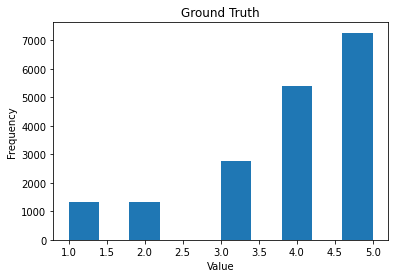

In [82]:
getHistogram('ratingScore', 'Ground Truth')

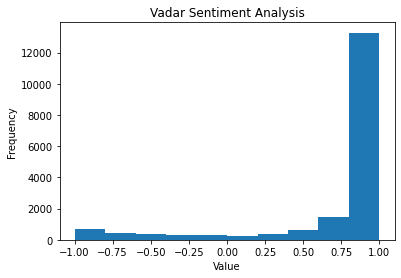

In [83]:
getHistogram('vader', 'Vadar Sentiment Analysis')

FREQUENCY OF rviews for ratings ascending : 183,217,447,805,849

we can see that the distributions are slightly different we can see that the vader is giving mostly giving positive values even for the negative reviews. if see the example 2324 of the top hotel I described above the user gave 3 rating but vader gave 0.98. The vader can be tricked by long legnthy reviews which have very high postive reviws and one negative word. It is catching in some instances but not all.


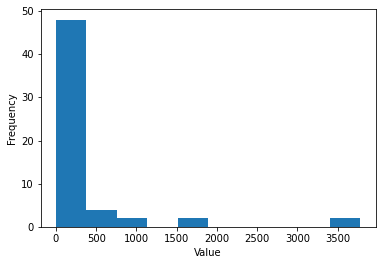

In [84]:
df = finaldf.groupby('hotelName').count() 
plt.hist(df['ratingScore'])
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

Yes the graph is skewed and there are more hotels in the low ratings side. This can be genrally expected becuase users tend to go to hotels with very positive reviews and also not all hotels have same strategic location, capacity.


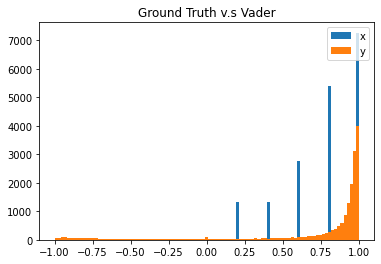

In [85]:
getHistogram('both', 'Ground Truth v.s Vader')

In [86]:
tpdf = pd.DataFrame(topkGroundPos[0:10])
tndf = pd.DataFrame(topkGroundNeg[0:10])
tpdf.columns =['word','count']
tndf.columns =['word','count']
tpdf['type'] = 'Positive'
tndf['type'] = 'Negative'
overlayhist = pd.concat([tpdf,tndf])

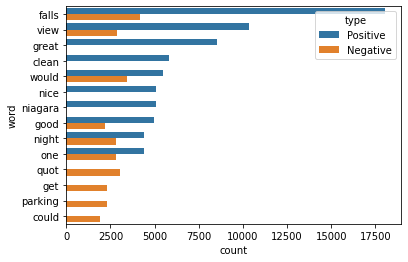

In [87]:
sns.barplot(x="count", y='word', hue='type', data=overlayhist)

**(b) Boxplots**

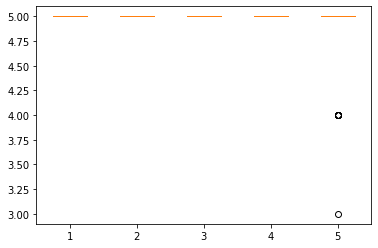

In [88]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

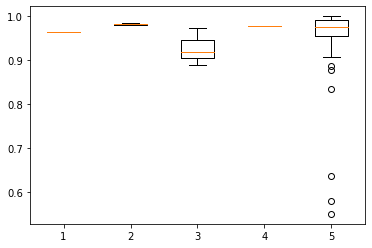

In [89]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['vader']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['vader']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['vader']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['vader']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['vader']

data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

THese box plots compare top five hotels picked according to the ground truth and compared the distribtuions for ratings and vader score. For the same hotels we can clearly see the vader sentiment scores are moved towards the top means vader is slighly biased towards the positive as said earlier.

In [90]:
tp5gthotel = hotelRatingDfVd.sort_values('avgvadersentiment',ascending=0).head(5)
tp5gthotel['hotelName'].values

array(['Serene Niagara Inn', 'Wenxin Bed &amp; Breakfast', 'Sharp Motel',
       'Two Rivers Bed &amp; Breakfast', 'Rockwell Resort'], dtype=object)

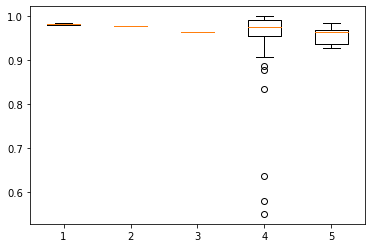

In [91]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfVd.sort_values('avgvadersentiment',ascending=0).head(5)
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['vader']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['vader']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['vader']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['vader']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['vader']


data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

Aging the vader distributiosn are less spread incoparision to average rating and they are towards the higher vader values.

In [92]:
hotelNames = finaldf['hotelName'].unique()
hotelRating = []
for hotel in hotelNames:
  itemDf = finaldf.loc[finaldf['hotelName']==hotel]
  hotelRating.append([hotel,itemDf['ratingScore'].count(),itemDf['ratingScore'].mean(),itemDf['ratingScore'].var(),itemDf['vader'].mean(),itemDf['vader'].var()])
hotelRatingDf = pd.DataFrame(hotelRating)
hotelRatingDf.columns=['hotelName','Number of Reviews','RatingScoreMean','RatingScoreVariance','VaderMean','VaderVariance']
hotelRatingDf = hotelRatingDf.sort_values('RatingScoreMean',ascending=0)
hotelRatingDf.head()

,hotelName,Number of Reviews,RatingScoreMean,RatingScoreVariance,VaderMean,VaderVariance
10,Sharp Motel,1,5.000000,NaN,0.964700,NaN
28,Serene Niagara Inn,2,5.000000,0.000000,0.981600,0.000010
24,Ascot Manor,3,5.000000,0.000000,0.926933,0.001824
11,Wenxin Bed &amp; Breakfast,1,5.000000,NaN,0.976900,NaN
29,Two Rivers Bed &amp; Breakfast,115,4.921739,0.090313,0.960105,0.004504


In general boxplots are more informative becuase we can geet the sense of destribution (becuase not all are gaussian) and also the onutliers. In this case we can see the outlier in the box plot and also distributiosn are more clear in the boxplots.


**(c) Scatterplots and heatmaps**

Text(0.5, 0, 'Vader Score')

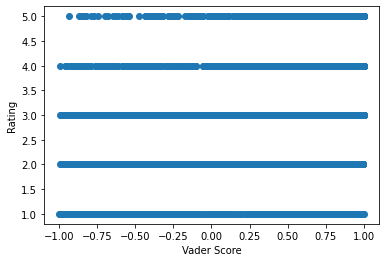

In [93]:
y = finaldf['ratingScore'].values
x = finaldf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

we can see that the in higer ground truth ratings the vader score is performing more better than the negative ground truth ratings. in case of lower ratings the vader has uniform distribution clealry meaning the vader is giving postive values for lower ratings and this can be due to the more subtle negative reviews. in case of positive raings the ratings are subjective eventhough two users right same review they can still give different ratings becuase it is subjective to them.

In [94]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

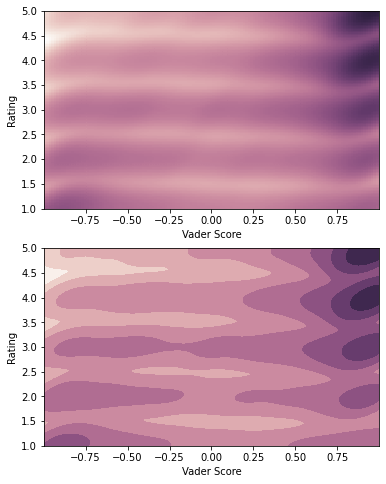

In [95]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

Text(0.5, 0, 'Length of Reviews')

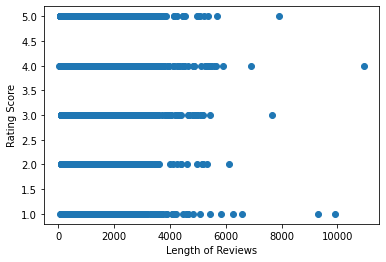

In [96]:
x = finaldf['reviewCol'].apply(len).values
y = finaldf['ratingScore'].values
plt.plot(x, y,"o")
plt.ylabel('Rating Score')
plt.xlabel('Length of Reviews')

we can see that the lenght review has no speicfic effect on the raing the distribution is almost uniform.



In [97]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

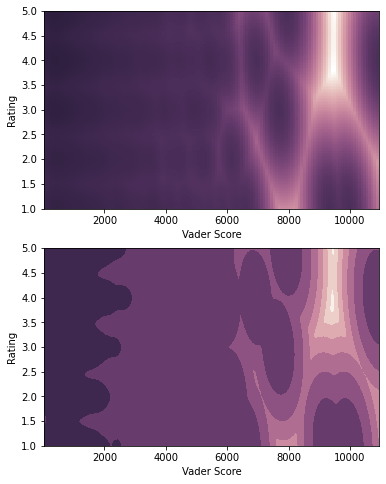

In [98]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

Text(0.5, 0, 'Length of Reviews')

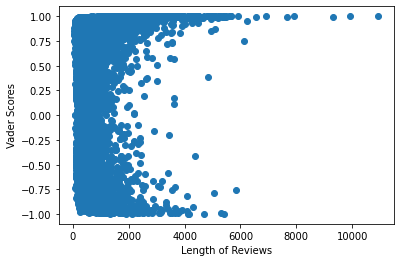

In [99]:
x = finaldf['reviewCol'].apply(len).values
y = finaldf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Vader Scores')
plt.xlabel('Length of Reviews')

We can see that this distribution is different from the above uniform distribution. The vader is getting more wrong in specific the 3 rating and 2 rating reviews which are larger. it means the reviews where the rater is writing more lenghtly reviews but only very few negative words and also the subjectiviey of the rater comes in to the part.

For lenghty reviews with mixed words may get the vader wrong. becuase during normalization of the vader score the lenghty reviews clearly get towards the positive side and this can be partially tuned.

In [100]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

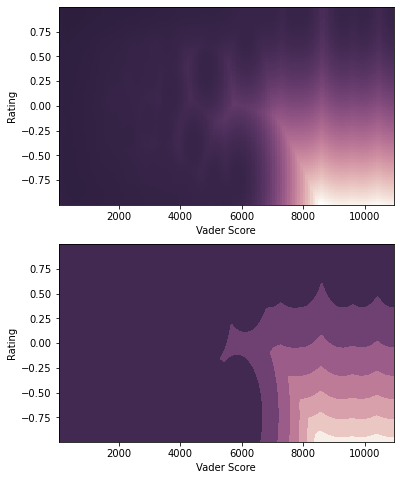

In [101]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

Text(0.5, 0, 'Length of Reviews')

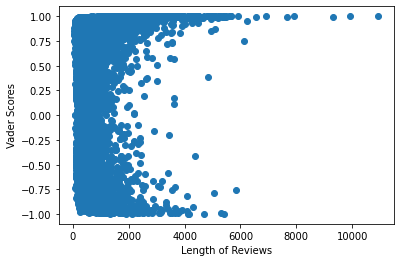

In [102]:
x = finaldf['reviewCol'].apply(len).values
y = finaldf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Vader Scores')
plt.xlabel('Length of Reviews')

We can see that this distribution is different from the above uniform distribution. The vader is getting more wrong in specific the 3 rating and 2 rating reviews which are larger. it means the reviews where the rater is writing more lenghtly reviews but only very few negative words and also the subjectiviey of the rater comes in to the part.
For lenghty reviews with mixed words may get the vader wrong. becuase during normalization of the vader score the lenghty reviews clearly get towards the positive side and this can be partially tuned.


We can see that the lower number of reviews the ratings are spread and for hihger reviews they are moslty positive. I cannot generalize anything becuase I have less number of hotels and only these two hotels may have strategic advatage.

Text(0.5, 0, 'Number of Reviews')

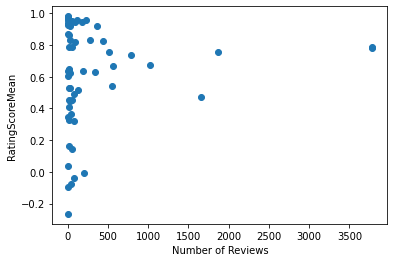

In [103]:
x = hotelRatingDf['Number of Reviews'].values
y = hotelRatingDf['VaderMean'].values
plt.plot(x, y,"o")
plt.ylabel('RatingScoreMean')
plt.xlabel('Number of Reviews')

I cannot generalize thisto becuase the hotels can have strategic advantage. and also the outlier for the one vader is due to the hotel has only one review.

In [104]:
finaldf_phrase.shape

(18131, 505)

In [105]:
mldf = finaldf_phrase.iloc[:,0:55]

In [106]:
mldf.head()

,hotelName,ratingScore,groundTruth,reviewCol,vader,niagara fall,front desk,clifton hill,great view,fallsview room,american fall,minute walk,great location,water park,hotel room,breakfast buffet,nthe room,horseshoe fall,hot tub,amazing view,hotel staff,short walk,falls view room,first time,parking lot,nthe hotel,room service,fall view,queen bed,canadian side,night stay,great place,front desk staff,crowne plaza,great time,next day,indoor pool,valet parking,spectacular view,customer service,pool area,fall view room,marriott fallsview,next time,rainbow bridge,great hotel,beautiful view,nice hotel,buffet breakfast,first night,free wifi,next morning,great stay,canadian fall,good view
0,E-Lodge Near the Falls,4,positive,"""my husband son and I came for Canada Day. We...",0.9017,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,E-Lodge Near the Falls,5,positive,"""Smashing!! We were welcomed to the Motel by e...",0.9114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,E-Lodge Near the Falls,2,negative,"""We chose this hotel as we had a car and did n...",0.5951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,E-Lodge Near the Falls,4,positive,"""Very affordable rooms in the Niagara Falls ar...",0.0129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E-Lodge Near the Falls,1,negative,"""I booked this hotel online, without having se...",-0.7219,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from scipy import stats

In [108]:
# get the baseline data
X =  mldf.iloc[:,5:55]
y = [1 if word == 'positive' else 0 for word in mldf['groundTruth'].values ]



# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.7108186904105271
Test accuracy: 0.70625


In [109]:
def random_mean_ci(X, y, num_tests):
  # train_results is a list of train accuracy results for the differrent random splits of the dataset
  train_results = []

  # test_results is a list of test accuracy results for the differrent random splits of the dataset
  test_results = []

  for i in range(0,num_tests):

    # split to train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))

    # train a logistic regression classifier
    clf = LogisticRegression(C=1.0).fit(X_train, y_train)

    # predict on train and test set
    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)

    # calculate train and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)

    train_results.append(train_accuracy)
    test_results.append(test_accuracy)
    

  train_mean = np.mean(train_results)
  train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))

  test_mean = np.mean(test_results)
  test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))


  assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
  assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"

  return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

In [110]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.7103301552281145
Train confidence interval over 10 random splits: [0.708423308198707, 0.712237002257522]
Test mean accuracy over 10 random splits: 0.7073345588235294
Test confidence interval over 10 random splits: [0.702736693960649, 0.7119324236864097]


In [111]:
reviews = reviewDF['reviewCol'].values  
topk = miScoredf_phrase['Word'].values[0:50]        
#Find out if a particular review has the word from topk list
freqReview = []
for i in range(len(reviews)):
  tempCounter = Counter(flatten([word 
                                  for word 
                                  in get_terms(chunker.parse(nltk.pos_tag(re.findall(r'\w+',reviews[i]))))]))
  topkinReview = [1 if tempCounter[word] > 0 else 0 for word in topk]
  freqReview.append(topkinReview)   
#Prepare freqReviewDf
MIReviewDf = pd.DataFrame(freqReview)

In [112]:
X =  MIReviewDf
y = [1 if word == 'positive' else 0 for word in mldf['groundTruth'].values ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression(C=1.0).fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.726341501851706
Test accuracy: 0.7306985294117647


In [113]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.7275234418091561
Train confidence interval over 10 random splits: [0.7264052148620032, 0.728641668756309]
Test mean accuracy over 10 random splits: 0.7263419117647059
Test confidence interval over 10 random splits: [0.723719202209428, 0.7289646213199837]


In [114]:
#clf = BernoulliNB().fit(X_train, y_train)
#clf = GaussianNB().fit(X_train, y_train)
clf = MultinomialNB().fit(X_train, y_train)
#clf = LogisticRegression(C=1.0).fit(X_train, y_train)

In [115]:
# get the baseline data
X =  MIReviewDf
y = [1 if word == 'positive' else 0 for word in mldf['groundTruth'].values ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = MultinomialNB().fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.7246867859112757
Test accuracy: 0.7261029411764706


In [116]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.7279410605941218
Train confidence interval over 10 random splits: [0.7265806865844779, 0.7293014346037656]
Test mean accuracy over 10 random splits: 0.7256433823529411
Test confidence interval over 10 random splits: [0.7225805463344603, 0.7287062183714219]
